In [1]:
import pandas as pd
import os

In [2]:
import numpy as np

In [3]:
import time
from tqdm import tqdm

In [4]:
import tensorflow as tf
import cv2
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

Using TensorFlow backend.


In [5]:
import pickle

In [68]:
import random

In [154]:
movie = pd.read_pickle('/Users/michael/Documents/UCSB_2017-2018/PSTAT 134/134MHCP/Top6.pkl')

In [130]:
movie = pd.read_csv("/Users/michael/Documents/UCSB_2017-2018/PSTAT 134/134MHCP/cleaned_movies.csv", encoding='utf-8')

In [155]:
titles = movie.Title.tolist()

In [156]:
len(titles)

17444

In [157]:
x = []
x_titles = []
for name in tqdm((os.listdir("/Users/michael/Documents/UCSB_2017-2018/PSTAT 134/134MHCP/Images/"))):
    sb = "/Users/michael/Documents/UCSB_2017-2018/PSTAT 134/134MHCP/Images/"+name
    s = name[:-4]
    x_titles.append(s)
    if(s in titles):
        img = cv2.imread(sb)
        x.append(img)

100%|██████████| 37873/37873 [00:41<00:00, 902.93it/s]


In [158]:
len(x)

17444

In [159]:
movie = movie.reset_index(drop = True)

In [160]:
movie.head(5)

,Title,Action,Comedy,Crime,Horror,Romance,Thriller,sample,Empty
0,#chicagoGirl: The Social Network Takes on a Di...,1,0,0,0,0,0,0,1
1,#Horror (2015),0,0,0,1,0,0,0,1
2,'71 (2014),1,0,0,0,0,1,0,2
3,'D' (2005),0,0,1,0,0,1,0,2
4,'G' Men (1935),0,0,1,0,0,0,0,1


In [185]:
df = movie.drop(movie.columns[0], axis=1)

In [186]:
df = df.drop(df.columns[6:8], axis = 1)

In [187]:
df.head(5)

,Action,Comedy,Crime,Horror,Romance,Thriller
0,1,0,0,0,0,0
1,0,0,0,1,0,0
2,1,0,0,0,0,1
3,0,0,1,0,0,1
4,0,0,1,0,0,0


In [188]:
y = df.values

In [189]:
x = np.stack(x)

In [190]:
print(x.shape)
print(y.shape)

(17444, 268, 182, 3)
(17444, 6)


In [191]:
from sklearn.cross_validation import train_test_split

In [192]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [193]:
input_shape = x_train[0].shape
num_class = y_train.shape[1]
print(input_shape)
print(num_class)

(268, 182, 3)
6


In [209]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# layer 2
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# layer 3
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# layer 4
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# layer 5
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# layer 6
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# layer 7
model.add(Dense(num_class))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [210]:
model.fit(x_train, y_train,
          batch_size=128, epochs=1, verbose=1)

Epoch 1/1
12210/12210 [==============================] - 443s 36ms/step - loss: 1.0320 - acc: 0.7422


In [211]:
prediction = model.predict(x_test)

In [219]:
y_test[204]

array([0, 0, 0, 1, 0, 0])

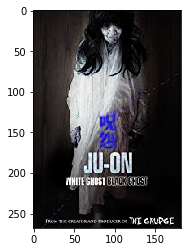

In [218]:
plt.imshow(x_test[204])

In [220]:
print(prediction[204])

[0.45941404 0.4590315  0.45514014 0.44865382 0.45796946 0.45542124]


In [54]:
np.argmax(prediction[130])

6

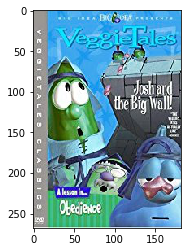

In [67]:
# plt.imshow(x_test[789])

In [ ]:
evaluate = model.evaluate(x_test,y_test)
print(evaluate)
print(model.metrics_names)

 960/5234 [====>.........................] - ETA: 1:03